In [1]:
import PDF
from scipy.integrate import quad, dblquad
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedUnbinnedNLL
import timeit
from iminuit import Minuit
from scipy.stats import norm
import uncertainties as uncert
import os




In [2]:
mu_true = 3
sigma_true = 0.3
beta_true= 1
m_true = 1.4
f_true =0.6
lam_true=0.3
mu_b_true =0
sigma_b_true = 2.5

x_min=0
x_max=5
y_min=0 
y_max=10

def integrand(Y, X):
    """Defines the integrand of the double integral of f_tot(x, y)"""
    return PDF.f_tot(X, Y, f=f_true, beta=beta_true, m=m_true, mu=mu_true, sigma=sigma_true, lam=lam_true, mu_b=mu_b_true, sigma_b=sigma_b_true)


g_s_integral, g_s_error = quad(lambda x: PDF.g_s(x, beta=beta_true, m=m_true, mu=mu_true, sigma=sigma_true), x_min, x_max)
h_s_integral, h_s_error = quad(lambda x: PDF.h_s(x, lam=lam_true), y_min, y_max)
g_b_integral, g_b_error = quad(PDF.g_b, x_min, x_max) 
h_b_integral, h_b_error = quad(lambda x: PDF.h_b(x, mu_b=mu_b_true, sigma_b=sigma_b_true), y_min, y_max)
f_tot_integral, f_tot_error = dblquad(integrand,x_min, x_max, lambda x: y_min, lambda x: y_max)



# Print the results
print(f"Integral of g_s(x) from {x_min} to {x_max}: {g_s_integral:.6f} (Error estimate: {g_s_error:.6e})")
print(f"Integral of h_s(y) from {y_min} to {y_max}: {h_s_integral:.6f} (Error estimate: {h_s_error:.6e})")
print(f"Integral of g_b(x) from {x_min} to {x_max}: {g_b_integral:.6f} (Error estimate: {g_b_error:.6e})")
print(f"Integral of h_b(y) from {y_min} to {y_max}: {h_b_integral:.6f} (Error estimate: {h_b_error:.6e})")
print(f"Integral of f_tot(x, y) from {x_min} to {x_max} and {y_min} to {y_max}: {f_tot_integral:.6f} (Error estimate: {f_tot_error:.6e})")

Integral of g_s(x) from 0 to 5: 1.000000 (Error estimate: 7.289797e-09)
Integral of h_s(y) from 0 to 10: 1.000000 (Error estimate: 1.110223e-14)
Integral of g_b(x) from 0 to 5: 1.000000 (Error estimate: 1.110223e-14)
Integral of h_b(y) from 0 to 10: 1.000000 (Error estimate: 4.839198e-12)
Integral of f_tot(x, y) from 0 to 5 and 0 to 10: 1.000000 (Error estimate: 4.373879e-09)


## Part C

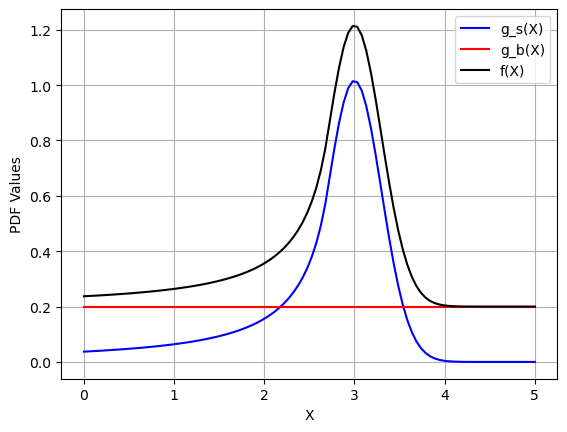

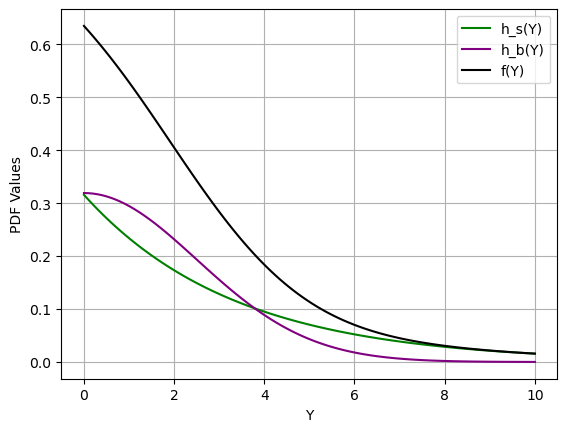

In [3]:
plots_folder_name = "Plots"

if not os.path.exists(plots_folder_name):
    os.makedirs(plots_folder_name)
    print(f"Created folder: {plots_folder_name}")

X=np.linspace(0,5,100)
Y=np.linspace(0,10,100)
plt.figure(1)  # First figure
plt.plot(X, PDF.g_s(X, beta=beta_true, m=m_true, mu=mu_true, sigma=sigma_true), label="g_s(X)", color='blue')
plt.plot(X, PDF.g_b(X), label="g_b(X)", color='red')
plt.plot(X,PDF.g_b(X)+PDF.g_s(X, beta=beta_true, m=m_true, mu=mu_true, sigma=sigma_true), color='black',label='f(X)')

plt.xlabel("X")
plt.ylabel("PDF Values")
plt.legend()
plt.grid(True)

plt.savefig(os.path.join(plots_folder_name, 'g_s_and_g_b_plot.png'), dpi=300, bbox_inches='tight')  # Save as PNG in the folder
plt.show()
plt.close()

# Create the second figure for h_s(Y) and h_b(Y)
plt.figure(2)  # Second figure
plt.plot(Y, PDF.h_s(Y, lam=lam_true), label="h_s(Y)", color='green')
plt.plot(Y, PDF.h_b(Y, mu_b=mu_b_true, sigma_b=sigma_b_true), label="h_b(Y)", color='purple')
plt.plot(Y,PDF.h_s(Y, lam=lam_true)+PDF.h_b(Y, mu_b=mu_b_true, sigma_b=sigma_b_true),color='black',label='f(Y)')
plt.xlabel("Y")
plt.ylabel("PDF Values")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(plots_folder_name,'h_s_and_h_b_plot.png'), dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()
plt.close()

<Figure size 640x480 with 0 Axes>

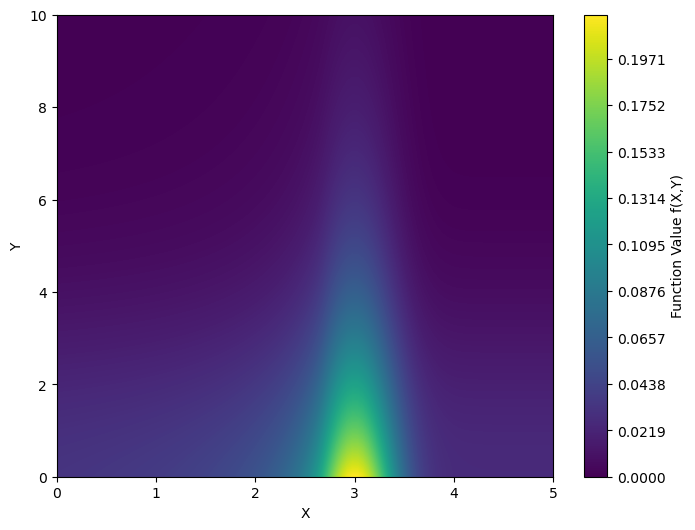

<Figure size 640x480 with 0 Axes>

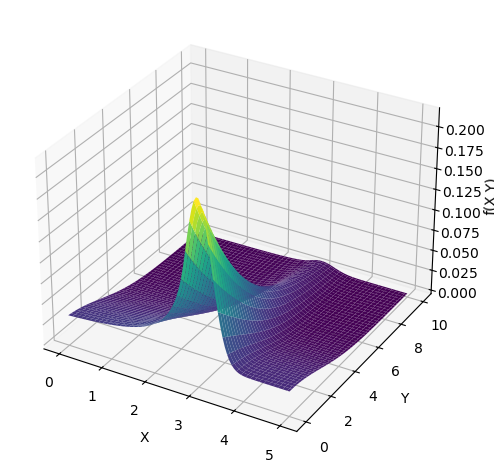

In [4]:
X=np.linspace(0,5,100)
Y=np.linspace(0,10,100)
X, Y = np.meshgrid(X, Y)
Z = PDF.f_tot(X, Y, f=f_true, beta=beta_true, m=m_true, mu=mu_true, sigma=sigma_true, lam=lam_true, mu_b=mu_b_true, sigma_b=sigma_b_true)

plt.figure(1)
plt.figure(figsize=(8, 6))

# Filled contour plot
contour_filled = plt.contourf(X, Y, Z, levels=800, cmap='viridis')

# Add a colorbar to the filled contour plot
plt.colorbar(contour_filled, label='Function Value f(X,Y)')

# Add labels and title

plt.xlabel("X")
plt.ylabel("Y")
plt.savefig(os.path.join(plots_folder_name,'f_tot_plot.png'), dpi=300, bbox_inches='tight')  # Save as PNG
# Display the plot
plt.show()
plt.close()

plt.figure(2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k',linewidth=0)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(X,Y)")
plt.tight_layout()
plt.savefig(os.path.join(plots_folder_name,'f_tot_3d_plot.png'), dpi=300, bbox_inches='tight')  # Save as PNG



## Part d

In [5]:
max_value = np.max(Z)
def faster_event_generation(N):
    """
    This function generated N events using the acceptance-rejection method, 
    batches of N/2 events are generated each loop to speed up the process.
    """
    accepted_points = []
    np.random.seed(10)
    while len(accepted_points)<N:
        x_batch = np.random.uniform(0, 5, int(N/2))
        y_batch = np.random.uniform(0, 10, int(N/2))
        y_guess = np.random.uniform(0, max_value, int(N/2))
        y_val = PDF.f_tot(x_batch, y_batch, f=f_true, beta=beta_true, m=m_true, 
                    mu=mu_true, sigma=sigma_true, lam=lam_true, mu_b=mu_b_true,
                    sigma_b=sigma_b_true)
        accepted_indices = y_guess <= y_val
        # Add accepted points to the list
        accepted_points.extend(zip(x_batch[accepted_indices], y_batch[accepted_indices]))
            
    accepted_points = np.array(accepted_points[:N])
    
    return accepted_points


    

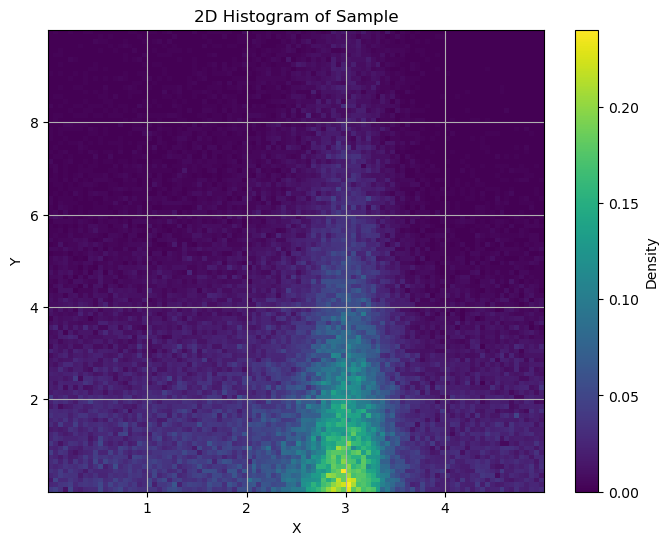

In [6]:
sample = faster_event_generation(100000)   
x = sample[:, 0]
y = sample[:, 1]
plt.figure(figsize=(8, 6))
plt.hist2d(x, y, bins=100, cmap='viridis',density=True)

# Add a colorbar to show the number of points in each bin
plt.colorbar(label='Density')

plt.title("2D Histogram of Sample")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.savefig(os.path.join(plots_folder_name,'sample_2D.png'), dpi=300, bbox_inches='tight')  # Save as PNG
plt.show()

In [7]:
def density(data,N,f,beta,m,mu,sigma,lam,mu_b,sigma_b):
    "This function returns the number of events, N and the PDF multiplied by N"
    X,Y =data
    return N, N*PDF.f_tot(X,Y,f,beta,m,mu,sigma,lam,mu_b,sigma_b)

nll = ExtendedUnbinnedNLL(sample.T, density)

mi = Minuit(nll , N=100000, f=0.6 ,beta=1 ,m=1.4 ,mu=3 ,sigma=0.3 ,lam=0.3 ,mu_b=0.0 ,sigma_b=2.5)

mi.migrad()

mi.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.461e+06                 │              Nfcn = 268              │
│ EDM = 0.00107 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N       │ 100.00e3  │  0.32e3   │            │            │         │         │       │
│ 1 │ f       │   0.600   │   0.004   │            │            │         │         │       │
│ 2 │ beta    │   0.988   │   0.022   │            │            │         │         │       │
│ 3 │ m       │   1.44    │   0.06    │            │            │         │         │       │
│ 4 │ mu      │  3.0017   │  0.0026   │            │            │         │         │       │
│ 5 │ sigma   │  0.2999   │  0.0025   │            │            │         │         │       │
│ 6 │ lam     │  0.3009   │  0.0021   │            │            │         │         │       │
│ 7 │ mu_b    │   0.07    │   0.08    │            │            │         │         │       │
│ 8 │ sigma_b │   2.47    │   0.04    │            │            │         │         │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│         │         N         f      beta         m        mu     sigma       lam      mu_b   sigma_b │
├─────────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│       N │     1e+05         0        -0    -0.000      0e-6      0e-6      0e-6     0.000   -0.0000 │
│       f │         0  1.27e-05  0.007e-3 -0.085e-3     -0e-6      3e-6      2e-6  0.049e-3 -0.029e-3 │
│    beta │        -0  0.007e-3  0.000486   -1.2e-3    -31e-6     25e-6      1e-6    0.1e-3        -0 │
│       m │    -0.000 -0.085e-3   -1.2e-3   0.00411     57e-6    -54e-6    -12e-6    -0.001    0.0003 │
│      mu │      0e-6     -0e-6    -31e-6     57e-6  6.92e-06     -4e-6     -0e-6     -3e-6      2e-6 │
│   sigma │      0e-6      3e-6     25e-6    -54e-6     -4e-6  6.08e-06      0e-6     16e-6    -10e-6 │
│     lam │      0e-6      2e-6      1e-6    -12e-6     -0e-6      0e-6  4.26e-06     10e-6      4e-6 │
│    mu_b │     0.000  0.049e-3    0.1e-3    -0.001     -3e-6     16e-6     10e-6   0.00573   -0.0025 │
│ sigma_b │   -0.0000 -0.029e-3        -0    0.0003      2e-6    -10e-6      4e-6   -0.0025   0.00128 │
└─────────┴───────────────────────────────────────────────────────────────────────────────────────────┘

<ValueView N=100000.10551286669 f=0.5996968781756551 beta=0.9880766931944006 m=1.4377852353771037 mu=3.0016530320017454 sigma=0.2999035372838479 lam=0.3009305670726599 mu_b=0.06836217569604332 sigma_b=2.473910612853707>


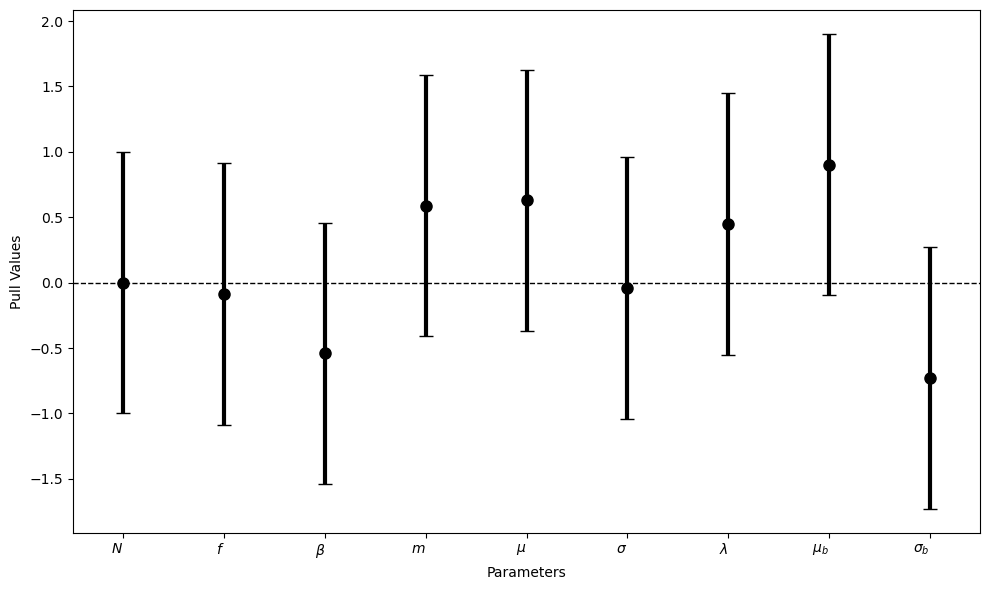

In [8]:
orig_fit= mi.values
orig_errors= mi.errors  
true_values = {
    '$N$': 100000,
    '$f$': 0.6,
    '$ beta $': 1,
    '$m$': 1.4,
    '$\mu$': 3,
    '$\sigma$': 0.3,
    '$\lambda$': 0.3,
    '$\mu_b$': 0.0,
    '$\sigma_b$': 2.5
}


print(orig_fit )
pull=[]

for i in range(len(orig_fit)):
    residual = (orig_fit[i]-np.array(list(true_values.values()))[i])
    pull.append(residual/orig_errors[i])

fig, ax = plt.subplots(figsize=(10, 6))

ax.errorbar(range(len(pull)), pull, yerr=1, fmt='o', label='Fit',elinewidth=3, markersize=8, capsize=5,color='black')

ax.axhline(0, color='black', lw=1, ls='--')


#ax.fill_between([-0.5,len(pull)], -1, 1, color='green', alpha=0.2, label='1$\sigma$')

ax.set_xticks(range(len(true_values)))  # Use the number of parameters
ax.set_xticklabels([r'$N$', r'$f$', r'$\beta$', r'$m$', r'$\mu$', r'$\sigma$', r'$\lambda$', r'$\mu_b$', r'$\sigma_b$'], ha='right')

ax.set_xlabel('Parameters')
ax.set_ylabel('Pull Values')

ax.set_xlim(-0.5, len(pull) - 0.5) 
# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(plots_folder_name,'pull_plot_orig.png'), dpi=300, bbox_inches='tight')  # Save as PNG

In [9]:


def run_faster_event_generation():
    faster_event_generation(100000)

def run_normal_dist():
    np.random.normal(size=100000)

def run_fit():
    mi.migrad()

time_norm = timeit.timeit(run_normal_dist, number=100)
average_time_norm = time_norm / 100

time_gen = timeit.timeit(run_faster_event_generation, number=100)
average_time_gen = time_gen / 100
average_time_gen_rel=average_time_gen/average_time_norm

time_fit = timeit.timeit(run_fit, number=100)
average_time_fit = time_fit / 100
average_time_fit_rel=average_time_fit/average_time_norm



print(f"Average time for 100 runs of normal dist: {average_time_norm:.4f} seconds")
print(f"Average relative time for 100 runs of event generation: {average_time_gen_rel:.4f} ")
print(f"Average relative time for 100 runs of fitting: {average_time_fit_rel:.4f}")

Average time for 100 runs of normal dist: 0.0011 seconds
Average relative time for 100 runs of event generation: 116.3672 
Average relative time for 100 runs of fitting: 434.6476


## Part e

In [10]:
#!python Parametric_bootstrapping.py  #Uncomment to run script again

In [11]:

# Define the directory and sample sizes
data_dir = "Parametric_Bootstrapping_Data"
sample_sizes = [500, 1000, 2500, 5000, 10000]

# Load values and errors into dictionaries
lambda_values = {}
lambda_errors = {}

for size in sample_sizes:
    values_path = f"{data_dir}/{size}_values.npy"
    errors_path = f"{data_dir}/{size}_errors.npy"
    lambda_values[size] = np.load(values_path)[:,6]
    lambda_errors[size] = np.load(errors_path)[:,6]


true_lam = np.load(f"{data_dir}/original_values.npy")[6]


In [12]:
def plot(xvals , ax=None):
    """Defines the plotting process"""
    ax = ax or plt.gca()
    # compute mean , sdev and their errors of distribution
    m = np.mean(xvals)
    s = np.std(xvals , ddof=1)
    me = s/len(xvals)**0.5
    se = s/(2*len(xvals)-1)**0.5
    # make a density histogram
    nh, xe = np.histogram( xvals , range =(m-3*s,m+3*s), bins='auto', density=True )
    # draw the density histogram
    ax.hist( xvals , bins=xe, density=True , alpha=0.5)
    # also draw error bars on points
    N = np.sum(nh)/len(xvals)
    cx = 0.5*(xe[1:]+xe[:-1])
    ax.errorbar( cx, nh, N*(nh/N)**0.5, fmt='ko')
    # draw the normal distribution with the mean and sigma
    x = np.linspace(xe[0],xe[-1],100)
    ax.plot(x, norm.pdf(x,m,s), 'r-')
    # plot the results (use uncertainties package for nice formatting)
    um = uncert.ufloat( m, me )
    us = uncert.ufloat( s, se )
    mstr = f"{um:.1u}".replace("+/-","\pm")
    sstr = f"{us:.1u}".replace("+/-","\pm")
    ax.text(0.01,0.92, f"$\hat{{\mu}} = {mstr}$", transform=ax.transAxes)   
    ax.text(0.01,0.86, f"$\hat{{\ sigma}} = {sstr}$", transform=ax.transAxes)
    ax.set_ylabel('Density')
    plt.tight_layout()

True lambda value: 0.29986628649728236


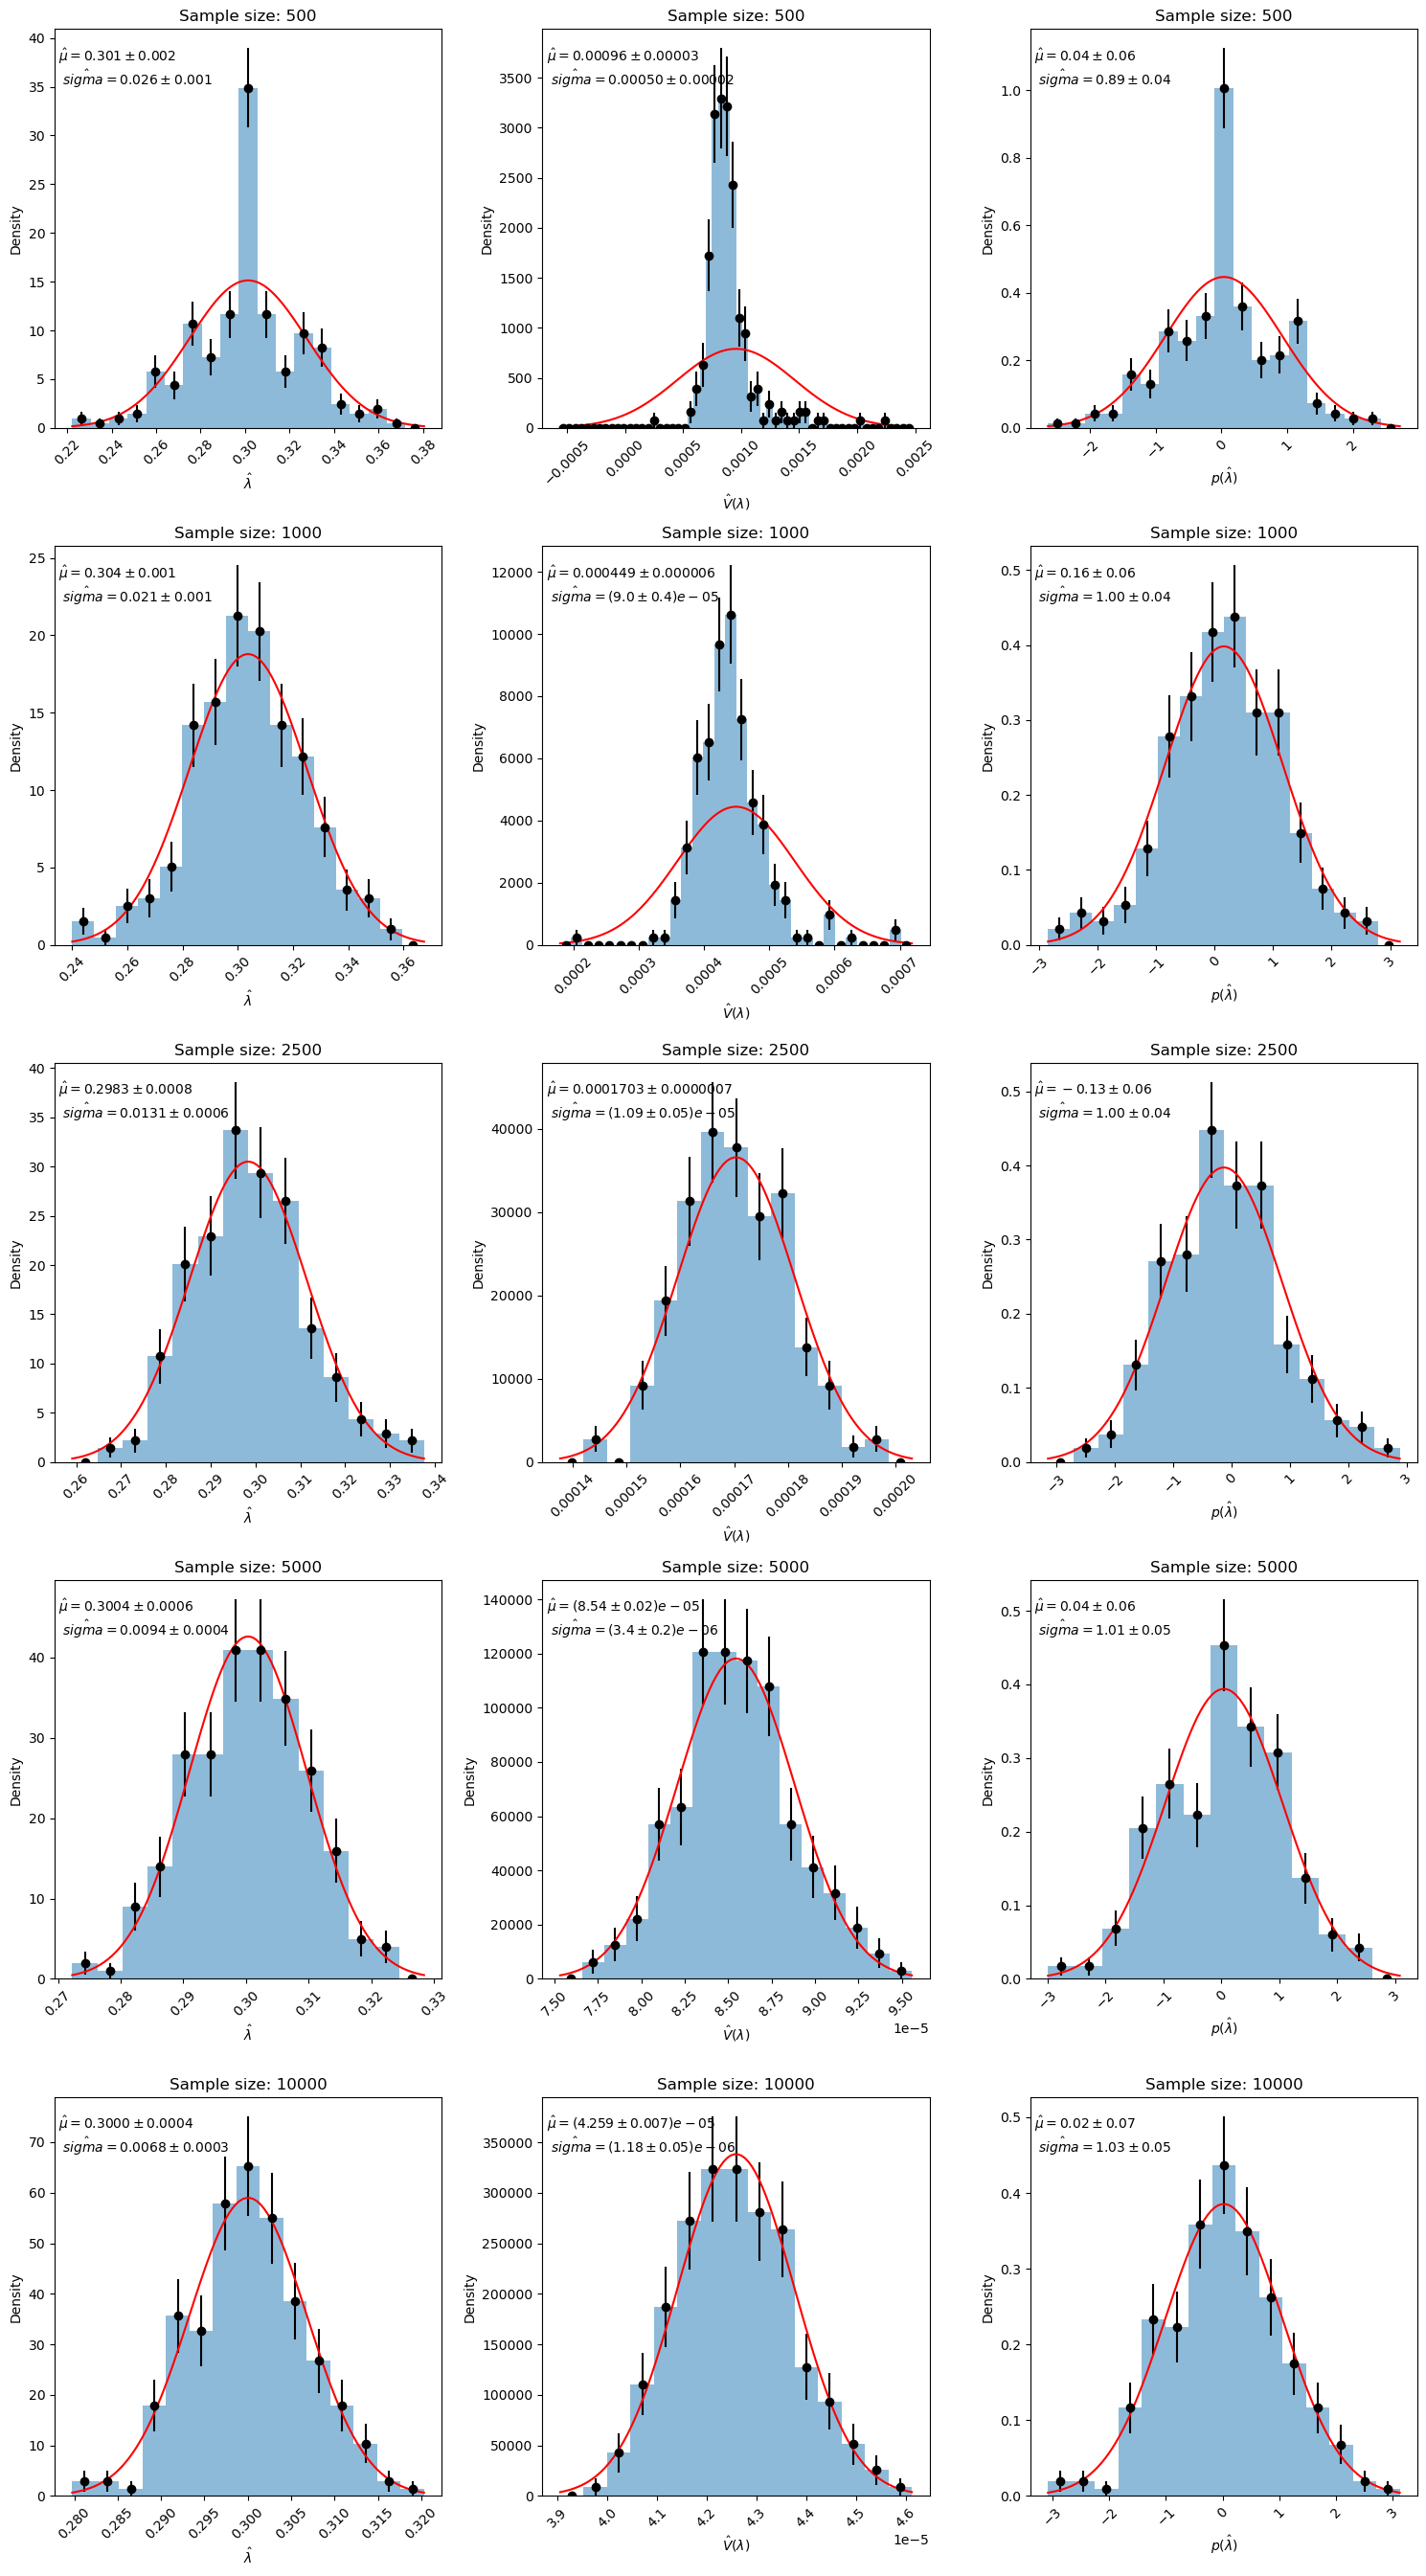

In [13]:
fig, axes = plt.subplots(5, 3, figsize=(15, 27))  
for i, sample_size in enumerate(sample_sizes):
    # Get the lam values and errors for this sample size
    values = np.array(lambda_values[sample_size])
    errors = np.array(lambda_errors[sample_size])

    # Calculate the pulls (residuals normalized by errors)
    pulls = (values - true_lam) / errors
    
    name = '\lambda'
    estname = f"\hat {{{ name.split('_ ')[0]}}}"
    if len(name.split('_'))>1: estname += '_'+name.split('_')[1]
        
    ax = axes[i,0]
    plot( values, ax )
    ax.set_xlabel( f"${estname}$" )

    ax = axes[i,1]
    plot( errors**2, ax )
    ax.set_xlabel( f"$\hat{{V}}({ name})$" )

    ax = axes[i,2]
    plot( pulls, ax )
    ax.set_xlabel( f"$p({ estname })$" )

    axes[i, 0].set_title(f"Sample size: {sample_size}")
    axes[i, 1].set_title(f"Sample size: {sample_size}")
    axes[i, 2].set_title(f"Sample size: {sample_size}")

for ax_row in axes:
    for ax in ax_row:
        for label in ax.get_xticklabels():
            label.set_rotation(45)

plt.tight_layout()
plt.savefig(os.path.join(plots_folder_name,'parametric_bootstrapping_lambda_vals.png'), dpi=300, bbox_inches='tight')  # Save as PNG
print('True lambda value:',true_lam)

[0.0564049  0.06331888 0.06350304 0.06405122 0.06545162]


/var/folders/27/607d42hs7jz87b8yg71lpk5r0000gn/T/ipykernel_8044/2883190104.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([500,10000],[1,1], 'k--', c='b')
/var/folders/27/607d42hs7jz87b8yg71lpk5r0000gn/T/ipykernel_8044/2883190104.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([500,10000],[-1,-1], 'k--', c='b')


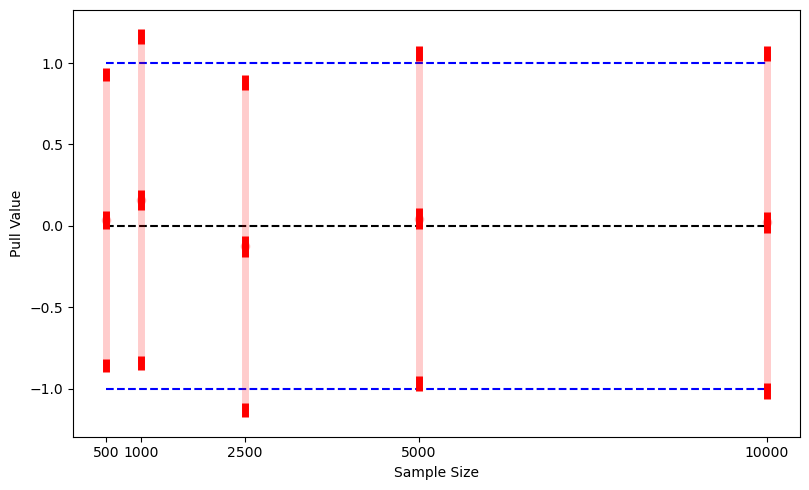

In [14]:
pull_data=[]


for i, sample_size in enumerate(sample_sizes):
    values = np.array(lambda_values[sample_size])
    errors = np.array(lambda_errors[sample_size])
    
    # Calculate the pulls (residuals normalized by errors)
    pulls = (values - true_lam) / errors


    m = np.mean(pulls)
    s = np.std(pulls , ddof=1)
    me = s/len(pulls)**0.5
    se = s/(2*len(pulls)-1)**0.5

    pull_data.append([m, me, s, se])



sample_sizes = [500, 1000, 2500, 5000, 10000]
pull_data = np.array(pull_data)
print(pull_data[:,1])

plt.figure(figsize=(8, 5))
plt.plot([500,10000],[0,0], 'k--')
plt.plot([500,10000],[1,1], 'k--', c='b')
plt.plot([500,10000],[-1,-1], 'k--', c='b')
plt.errorbar(sample_sizes, pull_data[:, 0], yerr=pull_data[:, 1], fmt='o', color='red', label='Mean ± Error', capsize=0,markersize=2, elinewidth=5)


plt.errorbar(sample_sizes, pull_data[:, 0]+pull_data[:, 2], yerr=pull_data[:, 3], fmt='o', color='red', capsize=0,markersize=2, elinewidth=5)
plt.errorbar(sample_sizes, pull_data[:, 0]-pull_data[:, 2], yerr=pull_data[:, 3], fmt='o', color='red', capsize=0,markersize=2, elinewidth=5)
plt.errorbar(sample_sizes, pull_data[:,0], yerr=pull_data[:,2],color='r',alpha=0.2,fmt='o',capsize=0,elinewidth=5)
plt.xlabel('Sample Size')
plt.xticks(sample_sizes, sample_sizes)
plt.tight_layout()
plt.ylabel('Pull Value')
plt.savefig(os.path.join(plots_folder_name,'parametric_bootstrapping_pulls.png'), dpi=300, bbox_inches='tight')  # Save as PNG

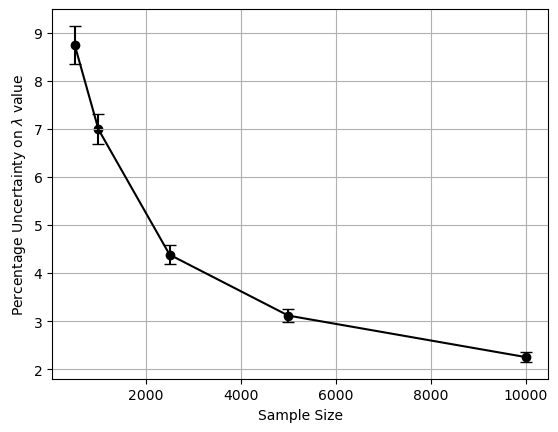

In [78]:
perc_uncer = []
perc_err= []
for i, sample_size in enumerate(sample_sizes):
    xvals = np.array(lambda_values[sample_size])
    s = np.std(xvals , ddof=1)
    se = s/(2*len(xvals)-1)**0.5
    m = np.mean(xvals)
    me = s/len(xvals)**0.5
    perc_uncer.append(100*(s/m))
    perc_err.append(100*(s/m)*np.sqrt((se/s)**2+(me/m)**2))

plt.scatter(sample_sizes,perc_uncer,color='black')
plt.errorbar(sample_sizes,perc_uncer,yerr=perc_err,color='black',capsize=4)
plt.xlabel('Sample Size')
plt.ylabel('Percentage Uncertainty on $\lambda$ value') 
plt.grid()
plt.savefig(os.path.join(plots_folder_name,'parametric_bootstrapping_uncertainty.png'), dpi=300, bbox_inches='tight')  # Save as PNG

## sWeights

In [16]:
# Define the directory and sample sizes
data_dir_sweight = "sWeighting_Data"
sample_sizes = [500, 1000, 2500, 5000, 10000]

# Load values and errors into dictionaries
lambda_values_sweight = {}
lambda_errors_sweight = {}

for size in sample_sizes:
    values_path = f"{data_dir_sweight}/{size}_lambda_values.npy"
    errors_path = f"{data_dir_sweight}/{size}_lambda_errors.npy"
    lambda_values_sweight[size] = np.load(values_path)
    lambda_errors_sweight[size] = np.load(errors_path)

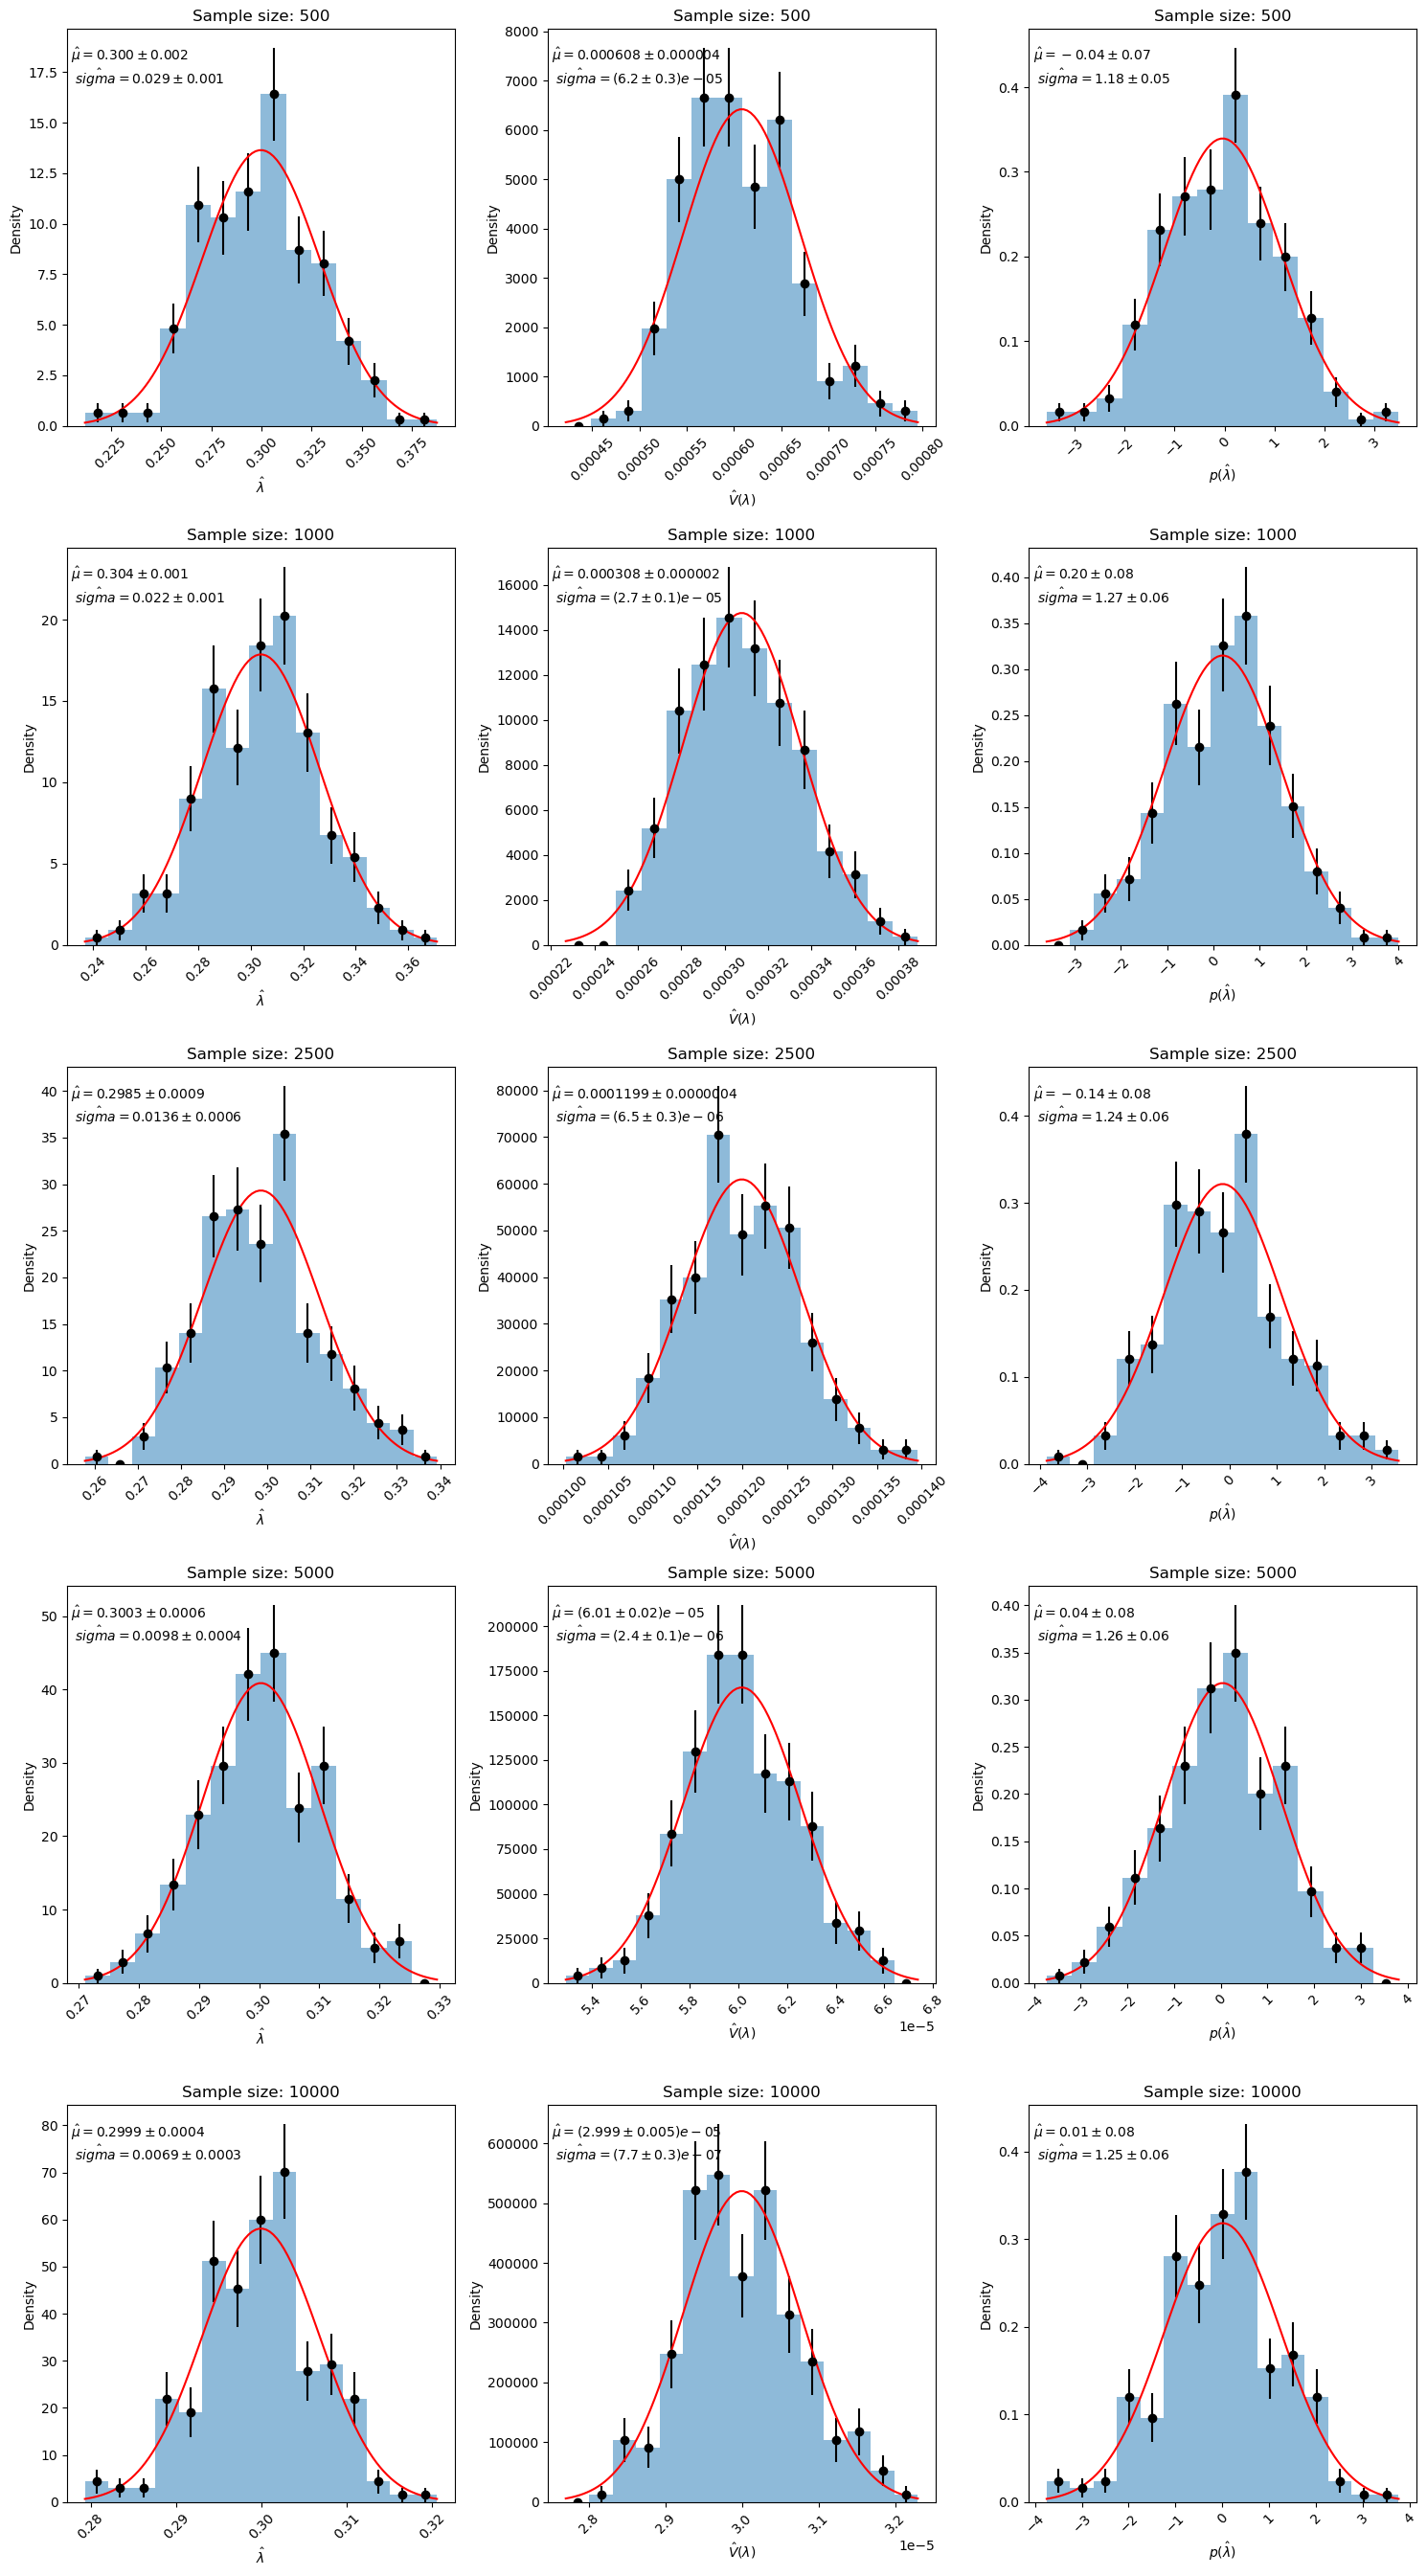

In [17]:
fig, axes = plt.subplots(5, 3, figsize=(15, 27))  
for i, sample_size in enumerate(sample_sizes):
    # Get the lam values and errors for this sample size
    values = np.array(lambda_values_sweight[sample_size])
    errors = np.array(lambda_errors_sweight[sample_size])

    # Calculate the pulls (residuals normalized by errors)
    pulls = (values - true_lam) / errors
    
    name = '\lambda'
    estname = f"\hat {{{ name.split('_ ')[0]}}}"
    if len(name.split('_'))>1: estname += '_'+name.split('_')[1]
        
    ax = axes[i,0]
    plot( values, ax )
    ax.set_xlabel( f"${estname}$" )

    ax = axes[i,1]
    plot( errors**2, ax )
    ax.set_xlabel( f"$\hat{{V}}({ name})$" )

    ax = axes[i,2]
    plot( pulls, ax )
    ax.set_xlabel( f"$p({ estname })$" )

    axes[i, 0].set_title(f"Sample size: {sample_size}")
    axes[i, 1].set_title(f"Sample size: {sample_size}")
    axes[i, 2].set_title(f"Sample size: {sample_size}")

for ax_row in axes:
    for ax in ax_row:
        for label in ax.get_xticklabels():
            label.set_rotation(45)

plt.tight_layout()
plt.savefig(os.path.join(plots_folder_name,'sWeighting_lambda_vals.png'), dpi=300, bbox_inches='tight')  # Save as PNG

/var/folders/27/607d42hs7jz87b8yg71lpk5r0000gn/T/ipykernel_8044/3575433358.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([300,10200],[1,1], 'k--', c='b')
/var/folders/27/607d42hs7jz87b8yg71lpk5r0000gn/T/ipykernel_8044/3575433358.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([300,10200],[-1,-1], 'k--', c='b')


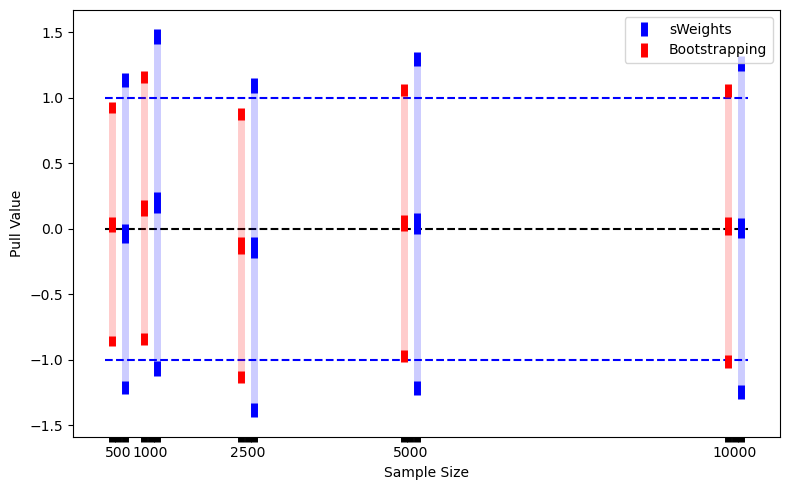

In [18]:
pull_data_sweights=[]

for i, sample_size in enumerate(sample_sizes):
    values_sweight = np.array(lambda_values_sweight[sample_size])
    errors_sweight = np.array(lambda_errors_sweight[sample_size])
    
    # Calculate the pulls (residuals normalized by errors)
    pulls_sweight = (values_sweight - true_lam) / errors_sweight


    m_sweight = np.mean(pulls_sweight)
    s_sweight = np.std(pulls_sweight , ddof=1)
    me_sweight = s_sweight/len(pulls_sweight)**0.5
    se_sweight = s_sweight/(2*len(pulls_sweight)-1)**0.5

    pull_data_sweights.append([m_sweight, me_sweight, s_sweight, se_sweight])

pull_data_sweights = np.array(pull_data_sweights)
plt.figure(figsize=(8, 5))
plt.plot([300,10200],[0,0], 'k--')
plt.plot([300,10200],[1,1], 'k--', c='b')
plt.plot([300,10200],[-1,-1], 'k--', c='b')
plt.errorbar(np.array(sample_sizes)+100, pull_data_sweights[:,0], yerr=pull_data_sweights[:,1],label='sWeights',fmt='o', capsize=0,markersize=2, elinewidth=5,c='blue')
plt.errorbar(np.array(sample_sizes)+100, pull_data_sweights[:, 0]+pull_data_sweights[:, 2], yerr=pull_data_sweights[:, 3], fmt='o', color='blue', capsize=0,markersize=2, elinewidth=5)
plt.errorbar(np.array(sample_sizes)+100, pull_data_sweights[:, 0]-pull_data_sweights[:, 2], yerr=pull_data_sweights[:, 3], fmt='o', color='blue', capsize=0,markersize=2, elinewidth=5)
plt.errorbar(np.array(sample_sizes)+100, pull_data_sweights[:,0], yerr=pull_data_sweights[:, 2],fmt='o', capsize=0,markersize=2, elinewidth=5,c='blue',alpha=0.2)


plt.errorbar(np.array(sample_sizes)-100, pull_data[:,0], yerr=pull_data[:,1],label='Bootstrapping',fmt='o', capsize=0,markersize=2, elinewidth=5,color='red')  
plt.errorbar(np.array(sample_sizes)-100, pull_data[:, 0]+pull_data[:, 2], yerr=pull_data[:, 3], fmt='o', color='r', capsize=0,markersize=2, elinewidth=5)
plt.errorbar(np.array(sample_sizes)-100, pull_data[:, 0]-pull_data[:, 2], yerr=pull_data[:, 3], fmt='o', color='r', capsize=0,markersize=2, elinewidth=5)
plt.errorbar(np.array(sample_sizes)-100, pull_data[:,0], yerr=pull_data[:, 2],fmt='o', capsize=0,markersize=2, elinewidth=5,c='r',alpha=0.2)


array1 = np.array(sample_sizes) - 100
array2 = np.array(sample_sizes) + 100
combined_ticks = np.concatenate((array1, array2))
# plt.xticks(sample_sizes, sample_sizes)
# plt.xticks(combined_ticks)

all_ticks = np.concatenate((sample_sizes, combined_ticks))

# Set the labels for all ticks, but leave the combined_ticks without labels
tick_labels = [str(tick) if tick in sample_sizes else '' for tick in all_ticks]

# Apply the ticks and labels to the plot
plt.xticks(all_ticks, tick_labels)
plt.tick_params(axis='x', width=5)  
plt.xlabel('Sample Size')
plt.ylabel('Pull Value')
plt.tight_layout()
plt.legend()

plt.savefig(os.path.join(plots_folder_name,'sWeighting_vs_parametric_boot_pulls.png'), dpi=300, bbox_inches='tight')  # Save as PNG

In [65]:
perc_uncer_sw = []
perc_err_sw=[]
for i, sample_size in enumerate(sample_sizes):
    values_sweight = np.array(lambda_values_sweight[sample_size])
    s = np.std(values_sweight , ddof=1)
    se = s/(2*len(values_sweight)-1)**0.5
    m = np.mean(values_sweight)
    me = s/len(values_sweight)**0.5
    perc_uncer_sw.append(100*(s/m))
    perc_err_sw.append(100*(s/m)*np.sqrt((se/s)**2+(me/m)**2))
    


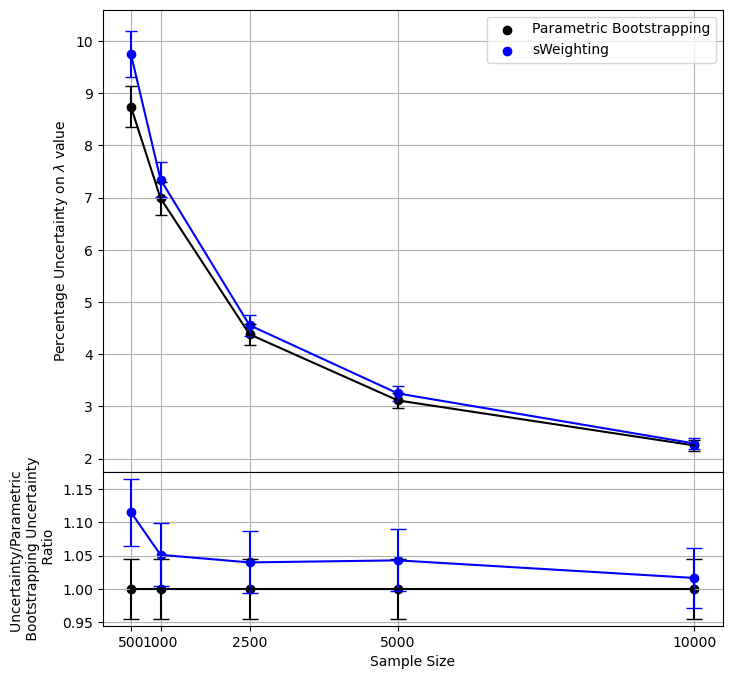

In [77]:
perc_uncer = np.array(perc_uncer)
perc_uncer_sw = np.array(perc_uncer_sw)


ratio_parametric = perc_uncer/perc_uncer
ratio_sweight = perc_uncer_sw/perc_uncer




ratio_err_paramatric = (perc_err/perc_uncer)
ratio_err_sweight = ratio_sweight*(perc_err_sw/perc_uncer_sw)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
ax1.scatter(sample_sizes,perc_uncer,color='black',label='Parametric Bootstrapping')
ax1.errorbar(sample_sizes,perc_uncer,yerr=perc_err,color='black',capsize=4)
ax1.scatter(sample_sizes,perc_uncer_sw ,label='sWeighting',color='blue')
ax1.errorbar(sample_sizes,perc_uncer_sw,yerr=perc_err_sw,capsize=4,color='blue')
ax1.legend()
ax1.grid()

ax2.errorbar(sample_sizes,ratio_parametric,yerr=ratio_err_paramatric,capsize=6,color='black')
ax2.errorbar(sample_sizes,ratio_sweight,yerr=ratio_err_sweight,capsize=6,color='blue')

ax2.scatter(sample_sizes,ratio_parametric,color='black',label='Parametric Bootstrapping')
ax2.scatter(sample_sizes,ratio_sweight,color='blue',label='sWeighting')
ax2.grid()
ax2.set_xlabel('Sample Size')
ax2.set_ylabel('Uncertainty/Parametric \n Bootstrapping Uncertainty \n Ratio')  
ax1.set_ylabel('Percentage Uncertainty on $\lambda$ value')
ax2.set_xticks(sample_sizes)
plt.subplots_adjust(hspace=0.0)


plt.savefig(os.path.join(plots_folder_name,'sWeighting_vs_parametric_boot_uncertainty.png'), dpi=300, bbox_inches='tight')  # Save as PNG